# OBJECTIVE:

The dataset has been taken from Kaggle and there are 17379 rows and 16 columns.

The goal is to predict the count of the bikes rented with the help of the attributes such as temperature, windspeed, humidity, etc.

The dataset is of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto, Portugal. 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic.

Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. 

There exists great interest in these systems due to their important role in traffic, environmental and health issues. All the data are recorded regarding this bike rental service and thus this feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Steps used:
1. Missing Value Detection, Outlier Removal

2. EDA

3. Correlation heatmap

4. Feature Engineering, One-hot encoding and multivariate regression


In [ ]:
#importing google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#data is stored in df_hour
df_hour=pd.read_csv("/content/drive/MyDrive/hour.csv",parse_dates=['dteday'])
df_hour.set_index('instant',inplace=True)

In [ ]:
#".head()" method will show the first 5 rows of the dataframe
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#summary of the data
df_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#The ".shape" attribute returns the overall shape of the data 
df_hour.shape

(17379, 16)

In [ ]:
#checking the datatypes of columns
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

# Exploring the data using Visualizations 

{'boxes': [<matplotlib.lines.Line2D at 0x7f5a423bcd90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5a423aadd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a4239ee10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a4239e8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5a423aa350>,
  <matplotlib.lines.Line2D at 0x7f5a423aa890>]}

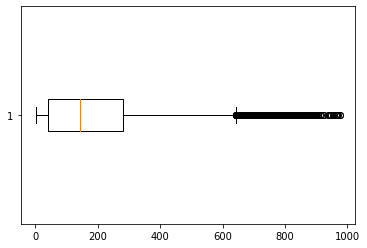

In [ ]:
plt.boxplot(df_hour.cnt,vert=False) #boxplot of the data

The distribution of the count variable is positively skewed with many outliers.

OUTLIER DETECTION AND REMOVAL

In [ ]:
df_hour.shape

(17379, 16)

In [ ]:
#function to remove outliers
def outlier_removal(dataframe, dataframe2, limit = 3):
        
    for col in dataframe2:           # This is for the variables to be treated from upper right whisker
        rw = limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)) + dataframe[col].quantile(0.75)
        lw = dataframe[col].quantile(0.25)-(limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)))
        dataframe = dataframe[~(dataframe[col]>rw)]
        dataframe = dataframe[~(dataframe[col]<lw)]
        dataframe = dataframe   
    
    return dataframe

In [ ]:
col=['cnt']
df_hour= outlier_removal(df_hour,df_hour[col], limit = 3) #calling the function

In [ ]:
df_hour.shape

(17379, 16)

NOTE: We have taken a wider horizon for outlier removal since we do not want to completely remove all higher hourly counts of bike rental because capturing the high count of bike renting is also important, but also to generalize the model for prediction.

Since, there are no outliers that cross the upper and lower bound of the outlier range, therefore, no outliers have been removed here.

In [ ]:
#The season numbers are replaced by their respective names and stored in another column
df_hour['season_name']=df_hour['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
df_hour.drop('season',axis=1,inplace=True)

In [ ]:
#summary of the count of bikes rented grouped across seasons
df_hour.groupby('season_name')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season_name,,,,,,,,
Fall,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
Spring,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
Summer,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
Winter,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


NOTE: The mean number of bikes are maximum for the Fall season.

# MISSING VALUES DETECTION

In [ ]:
df_hour.isnull().sum()

dteday         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
season_name    0
dtype: int64

There are no missing values in the columns. 

In [ ]:
# 0: 2011, 1: 2012
df_hour.groupby('yr')['cnt'].mean()

yr
0    143.794448
1    234.666361
Name: cnt, dtype: float64

NOTE: The mean bikes rented for the year 2012 is much higher than the previous year.

<BarContainer object of 4 artists>

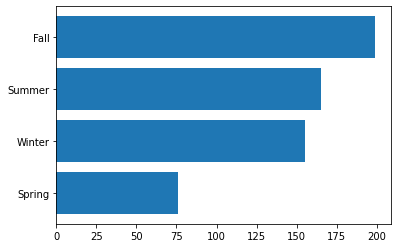

In [ ]:
#There are many outliers in the data, hence median values are considered
s2=df_hour.groupby('season_name')['cnt'].median().sort_values()
plt.barh(s2.index,s2)

NOTE: The Fall season has maximum number of bikes rented in terms of median values.

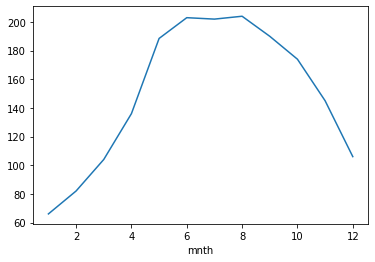

In [ ]:
#Plot of count vs months
df_hour.groupby('mnth')['cnt'].median().plot()

NOTE: The maximum bikes were rented in the months of May-October.

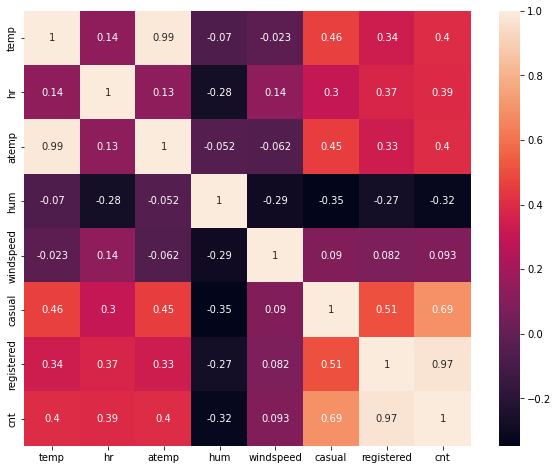

In [ ]:
#Correlation of the variables are plotted in form of a heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(df_hour[['temp','hr','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

NOTES:

1. temp and atemp are very highly correlated (significant p value) and hence one of them should be dropped to prevent the multicollinearity. We will drop the temp which is the actual temperature and keep atemp in our dataset since feel temperature is more important to tourists.

2. temp and cnt have correlation of 0.4 (significant p value) and since here, our objective is to predict the count of bike rents, temp can be considered as an important predictor variable.

3. Humidity is very weakly correlated with the other variables and hence, we can keep it. It is also negatively correlated with cnt. It might not be a very good predictor in bivariate regression to predict cnt.

4. Similarly windspeed is weakly associated with cnt and may not be that good a predictor but still slightly better than humidity.

5. Registered and casual bike rents are added to get the cnt column and they are showing more or less similar behavior with the other features and are highly correlated with cnt. Hence, we will drop casual and registered and work with only cnt.

6. Moderate Positive association between hour and count.


We will now check the VIF to detect the variables with high multicollinearity.

In [ ]:
v=df_hour[['temp', 'atemp', 'hum', 'windspeed','hr']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = v.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(v.values, i)
                          for i in range(len(v.columns))]
  
print(vif_data)

     feature         VIF
0       temp  319.337590
1      atemp  348.968241
2        hum    5.865330
3  windspeed    2.999914
4         hr    3.649304


NOTE: The VIF values are very high for temp and atemp variables, thus temp is dropped to prevent the effect of multicollinearity in the Linear Regression model.

In [ ]:
df_hour.drop('temp',axis=1,inplace=True)

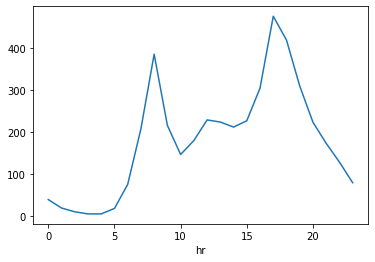

In [ ]:
df_hour.groupby('hr')['cnt'].median().plot()

NOTE: Maximum number of bikes are rented during the morning and afternoon hours.

In [ ]:
# converting the weathersit column to their corresponding labels
df_hour['WC'] = df_hour['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])

In [ ]:
df_hour.groupby('WC')['cnt'].median().sort_values(ascending=False)

WC
Clear         159.0
Mist          133.0
Light Snow     63.0
Heavy Rain     36.0
Name: cnt, dtype: float64

NOTE: Maximum bikes are rented during clear weather.

# Feature Engineering

In [ ]:
#function to check the day of the week
def dayofweek(day):
    if day==0:
        return "Sunday"
    elif day==1:
        return "Monday"
    elif day==2:
        return "Tuesday"
    elif day==3:
        return "Wednesday"
    elif day==4:
        return "Thursday"
    elif day==5:
        return "Friday"
    elif day==6:
        return "Saturday"

In [ ]:
#defining a new variable which shows the day of the week along with whether it's a workday, holiday or weekend
def day_type(df):
    df['day_type']=0
    for i in range(df.shape[0]):
        if (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Weekend-'+day
        elif (df.holiday.iloc[i]==1) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Holiday-'+day
        elif (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==1):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Work-'+day 
    return df

In [ ]:
df_hour=day_type(df_hour) #calling the above function 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#dropping the variables which are not required
df_hour.drop(['weathersit','weekday','casual','registered'],axis=1,inplace=True)
df_hour.head(2)

,dteday,yr,mnth,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday
2,2011-01-01,0,1,1,0,0,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday


In [ ]:
df_hour.groupby('day_type')['cnt'].describe() #summary of the day_type variable created

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
Holiday-Friday,48.0,135.291667,95.655846,3.0,46.75,129.0,208.25,331.0
Holiday-Monday,357.0,166.960784,162.468091,1.0,31.00,100.0,281.00,712.0
Holiday-Thursday,48.0,81.666667,77.569278,2.0,22.75,46.0,124.75,269.0
Holiday-Tuesday,23.0,44.043478,41.126720,1.0,12.00,32.0,68.00,126.0
Holiday-Wednesday,24.0,308.458333,202.209100,16.0,115.50,401.5,487.25,584.0
Weekend-Saturday,2512.0,190.209793,179.820569,1.0,42.00,129.0,300.00,783.0
Weekend-Sunday,2502.0,177.468825,168.167710,1.0,40.00,116.0,288.00,776.0
Work-Friday,2439.0,197.333333,175.067581,1.0,48.00,165.0,289.50,957.0
Work-Monday,2122.0,186.568332,182.108719,1.0,37.00,142.5,266.75,968.0


<BarContainer object of 12 artists>

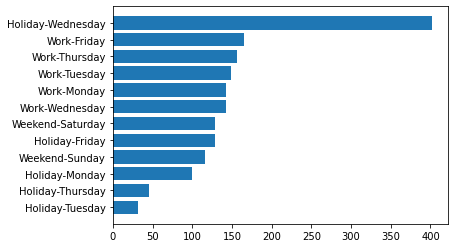

In [ ]:
m=df_hour.groupby('day_type')['cnt'].median().sort_values()
plt.barh(m.index,m)

In [ ]:
df_hour[df_hour['day_type']=='Holiday-Wednesday']

,dteday,yr,mnth,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,
13076,2012-07-04,1,7,0,1,0,0.6364,0.79,0.0896,159,Fall,Clear,Holiday-Wednesday
13077,2012-07-04,1,7,1,1,0,0.6364,0.74,0.0000,123,Fall,Clear,Holiday-Wednesday
13078,2012-07-04,1,7,2,1,0,0.6061,0.83,0.1343,93,Fall,Clear,Holiday-Wednesday
13079,2012-07-04,1,7,3,1,0,0.6364,0.74,0.1940,32,Fall,Clear,Holiday-Wednesday
13080,2012-07-04,1,7,4,1,0,0.6364,0.69,0.2537,16,Fall,Clear,Holiday-Wednesday
13081,2012-07-04,1,7,5,1,0,0.6212,0.69,0.0000,19,Fall,Clear,Holiday-Wednesday
13082,2012-07-04,1,7,6,1,0,0.6212,0.69,0.0000,32,Fall,Clear,Holiday-Wednesday
13083,2012-07-04,1,7,7,1,0,0.6364,0.65,0.0000,72,Fall,Clear,Holiday-Wednesday
13084,2012-07-04,1,7,8,1,0,0.6515,0.61,0.1045,153,Fall,Clear,Holiday-Wednesday


NOTE: The bikes rented is significantly high for a Wednesday when it was a holiday.

In [ ]:
df_hour[['day', 'type']] = df_hour['day_type'].str.split('-', 2, expand=True)#Splitting the day_type variable into two columns

In [ ]:
df_hour.head()

,dteday,yr,mnth,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_name,WC,day_type,day,type
instant,,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday,Weekend,Saturday
2,2011-01-01,0,1,1,0,0,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday,Weekend,Saturday
3,2011-01-01,0,1,2,0,0,0.2727,0.80,0.0,32,Spring,Clear,Weekend-Saturday,Weekend,Saturday
4,2011-01-01,0,1,3,0,0,0.2879,0.75,0.0,13,Spring,Clear,Weekend-Saturday,Weekend,Saturday
5,2011-01-01,0,1,4,0,0,0.2879,0.75,0.0,1,Spring,Clear,Weekend-Saturday,Weekend,Saturday


<BarContainer object of 3 artists>

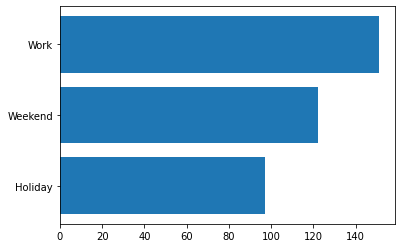

In [ ]:
d=df_hour.groupby('day')['cnt'].median().sort_values()
plt.barh(d.index,d)

NOTE: Maximum bikes are hired during the working days.

<BarContainer object of 7 artists>

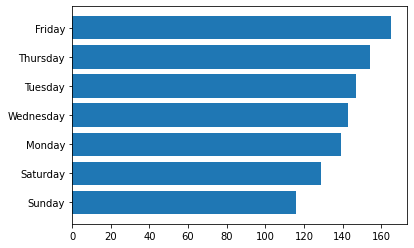

In [ ]:
d1=df_hour.groupby('type')['cnt'].median().sort_values()
plt.barh(d1.index,d1)

NOTE: Friday , Thursdays are the days when more bikes are hired than the rest of weekdays.

Summary: 
1. Season wise - Fall season has got the highest median 
2. Monthwise- May to October has max hiring
3. Clear - max median hiring, for heavy rain, it is min
4. Friday - median max hiring

We have dropped 'atemp' since there is high correlation with temp. Our target variable is 'cnt'. 

We have seen before that hum and windspeed have weak correlation with cnt but the correlation is significant indicating that there linear relationship is significant. Hence, we are not dropping those variables.

Hum and windspeed have weak negative correlation, therefore, we are not dropping any of them.


In [ ]:
df_hour.drop(['dteday','holiday','workingday','day_type'],axis=1,inplace=True)
#We have created variables for weathersit - WC, season-seaon_name, holiday-day, workingday-type. Hence, those variables are dropped

In [ ]:
categorical_cols = df_hour.select_dtypes('object').columns.tolist()
categorical_cols

['season_name', 'WC', 'day', 'type']

In [ ]:
#One hot encoding is done on the data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df_hour[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_hour[encoded_cols] = encoder.transform(df_hour[categorical_cols])

In [ ]:
df_hour.head(2)

,yr,mnth,hr,atemp,hum,windspeed,cnt,season_name,WC,day,...,day_Holiday,day_Weekend,day_Work,type_Friday,type_Monday,type_Saturday,type_Sunday,type_Thursday,type_Tuesday,type_Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0.2879,0.81,0.0,16,Spring,Clear,Weekend,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,1,0.2727,0.80,0.0,40,Spring,Clear,Weekend,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_hour.drop(['season_name','WC','day','type'],axis=1,inplace=True)

MULTIVARIATE REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     452.8
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:41:53   Log-Likelihood:                -83020.
No. Observations:               13034   AIC:                         1.661e+05
Df Residuals:                   13014   BIC:                         1.662e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
yr                    81.4261      2

From the above regression, we can see that many features have insignificant p values and hence those variables are not affecting the prediction of our dependent variable cnt. Hence, they should be dropped.

In [ ]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

139.4905502182475


In [ ]:
df_hour.columns

Index(['yr', 'mnth', 'hr', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_name_Fall', 'season_name_Spring', 'season_name_Summer',
       'season_name_Winter', 'WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday'],
      dtype='object')

In [ ]:
df_hour.drop(['WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday','mnth','season_name_Summer','windspeed'],axis=1,inplace=True)

In [ ]:
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              4569.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                        0.00
Time:                        15:41:53   Log-Likelihood:                         -83062.
No. Observations:               13034   AIC:                                  1.661e+05
Df Residuals:                   13027   BIC:                                  1.662e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Coeffiecient of Determination is quite high in this case and we will keep this regression as our predicting model. All the features are significant as well. 

In [ ]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

140.130018015678


RMSE value is slightly higher than the previous model, still this model would be better since we have all significant predictors with high R2 value.

From the above Linear Regression model, we can see that the skewness is not 0 and kurtosis is not 3 which would indicate that the residuals obtained are not normally distributed. Also, from Jarque-Bera test which is coming significant, we can say that the residuals are not normally distributed.  

This means that the data is not linear and the non-linearity part of the data is not captured by the Linear Regression model. Thus, we need to use non linear regression models for our prediction analysis like Decision Tree and Random Forest.

Function for other models

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# call a function named 'ml_model' which will call all Regressor model
def predict(ml_model):

    # Define Models Name
    print('Model: {}'.format(ml_model))

    # fit all models with data
    model= ml_model.fit(X_train,y_train)

    # Model Training Score
    print("Training score: {}".format(model.score(X_train,y_train)))

    #finding adjusted R2 for the model
    adj_r2=1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print("Training Adjusted R2: {}".format(adj_r2))

    # Model Predictions
    predictions = model.predict(X_test)

    # Define r2 score for Regressor Model
    r2score=r2_score(y_test,predictions) 
    print("r2 score: {}".format(r2score))
          
    # Model Evaluation with MAE, MSE, RMSE
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

# Decision Tree Regression

In [ ]:
predict(DecisionTreeRegressor(random_state=42))

Model: DecisionTreeRegressor(random_state=42)
Training score: 0.9636876917441071
Training Adjusted R2: 0.9636681779902463
r2 score: 0.5697261353539713
MAE:71.16410433448408
MSE:13836.881006009464
RMSE:117.63027248973567


The train R2 value and test R2 are largely different from each other indicating Decision Tree is largely overfitting the train data. 
Hence, hyper-parameter tuning would be required.

# Decision Tree Regression using Random SearchCV

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 10)]

max_features = ['auto', 'sqrt', 5, 6, 8, 10]


random_grid = {'max_features': max_features,
               'max_depth': max_depth}

train_model = DecisionTreeRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available scores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_features': 'auto', 'max_depth': 9}
DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_

In [ ]:
predict(DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=42))

Model: DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=42)
Training score: 0.7726269961149963
Training Adjusted R2: 0.7725048088720057
r2 score: 0.7410324289394203
MAE:61.23123793447387
MSE:8327.959840480667
RMSE:91.25765633896516


The Decision Tree Regression model, after hyper-parameter tuning, gives lesser MAE, MSE and RMSE scores and the problem of over-fitting is also solved.

Next, we will check with Random Forest regression model and see if the results are improved further.

#Random Forest Regression

In [ ]:
predict(RandomForestRegressor(random_state = 42))

Model: RandomForestRegressor(random_state=42)
Training score: 0.9370503888161182
Training Adjusted R2: 0.9370165605282104
r2 score: 0.7205349824453304
MAE:60.42608905036914
MSE:8987.12311152687
RMSE:94.80043835092151


Without any hyper-parameter tuning, we can see that RF model is not able to overcome the problem of overfitting properly. Hence, I will do with RF modeling using Random SearchCV.

#Random Forest Regression using Random SearchCV

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

# Maximum number of levels in tree
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
max_depth = [int(x) for x in np.linspace(5, 25, num = 10)]
max_features = ['auto', 'sqrt', 5, 6, 8, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

train_model = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

{'n_estimators': 500, 'max_features': 6, 'max_depth': 11}
RandomForestRegressor(max_depth=11, max_features=6, n_estimators=500,
                      random_state=42)


In [ ]:
predict(RandomForestRegressor(max_depth=11, max_features=6, n_estimators=500,
                      random_state=42))

Model: RandomForestRegressor(max_depth=11, max_features=6, n_estimators=500,
                      random_state=42)
Training score: 0.8306202212512882
Training Adjusted R2: 0.8305291987999416
r2 score: 0.7689289047638156
MAE:57.79175920473683
MSE:7430.856278806695
RMSE:86.2024145764299


The performance metrics scores have decreased further and R2 value has increased, thereby we can conclude that Random Forest Regression model is performing better than Decision Tree. Thus, the model that I will use for predicting the bike rental behaviour is Random Forest Regression.

# CONCLUSION:



This model would help any rental business to get an estimate of the number of bikes that would be rented based on the features like year, hour, temperature, season,etc. They would understand the hourly demand of bikes in a day and grow their business accordingly. 

The model used here is Random Forest Regression which is able to predict the number of bikes that could be rented in an hourly basis.